In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [12]:
wordle = 'answers.txt'

# Open and read contents of file
with open(wordle) as src:
    og = src.read()
    
    # strip double quotes
    og = og.replace('"', '')
    
    # make list
    words = [i for i in og[1:-1].split(',')]

In [13]:
# Create dict to recieve letters and counts
alpha = {}

# Loop through each wordle answer
for word in words:
    # Break each word into its 5 letters
    letters = list(word)
    
    # Get count of every unique letter in that word
    u_letters, counts = np.unique(letters, return_counts=True)
    
    # Make a smaller dictionary to relate letters to counts
    u_c = dict(zip(u_letters, counts))
    
    for i in u_c:
        try:
            # update the the count for each letter already in the alpha dict
            alpha[i] = alpha[i]+ u_c[i]
        except KeyError:
            # add new dict key if not already present in alpha dict
            alpha[i] = u_c[i]

#Create sorted list of tuples (sorted by value)
s_alpha = sorted([(i,v) for i, v in zip(alpha.keys(), alpha.values())], key=lambda x: x[1], reverse=True)

s_letters = [i[0].upper() for i in s_alpha] # letters sorted by count (descending order)
s_vals = [i[1] for i in s_alpha]            # counts sorted by count (descending order)

In [14]:
# Make a colormap using RGBA from wordle
def wordle_cmap():
    cmap = []
    
    [cmap.append((106/255, 172/255, 100/255, 1)) for i in range(10)] # Green
    [cmap.append((202/255, 181/255, 87/255, 1)) for i in range(8)]   # Yellow
    [cmap.append((121/255, 125/255, 127/255, 1)) for i in range(8)]  # Grey
    
    return cmap

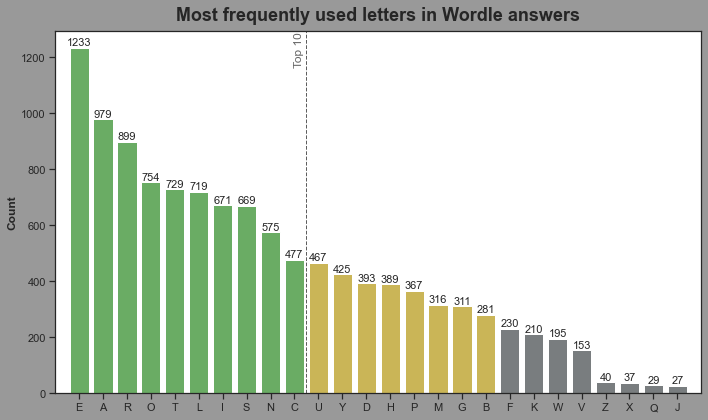

In [15]:
# Plot Distribution
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

b = ax.bar(s_letters, s_vals, color=wordle_cmap());
ax.axvline(9.5, c='k', ls='--',lw=1, alpha=0.7)

ax.set_xlim(-1,26)
ax.set_ylabel('Count', weight='bold')
ax.bar_label(b, size=11)
ax.annotate('Top 10', (9, 1170), rotation=90, alpha=0.7)
ax.set_title('Most frequently used letters in Wordle answers', size=18, pad=10, weight='bold')


fig.patch.set_facecolor((0.6, 0.6, 0.6, 1))
plt.tight_layout()
plt.savefig('TheDistribution.png', dpi=300)